In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import pandas as pd
import ollama
from pathlib import Path

from src.qa import QuestionAnswering
from src.vectordb import ChromaDB
from src.verifier import Verifier
from src.reporting import folder_to_dataframe #collate results

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [182]:
from src.pipeline import Pipeline

In [15]:
full_corpus_dataset = pd.read_csv('/data/METCLOUD-alldata.csv')
full_corpus_dataset = full_corpus_dataset.rename(columns={'Question':'question','Answer':'answer'})

In [198]:
pipeline = Pipeline(llm_model = 'metcloud_1epoch_llama-3-8b-Instruct-bnb-4bit:latest',
                    emb_model = 'all-mpnet-base-v2',
                    corpus    = full_corpus_dataset)

In [199]:
print(pipeline.ask_question( question = 'Who is the CEO of metcloud?'))

Info retrieved!
('Ian Vickers is the CEO of METCLOUD. Under his leadership, the company has achieved numerous international awards for innovation and is planning for international expansion in 2024. Additionally, Ian plays a significant role in various advocacy efforts, including being Chair of the Birmingham Related Crime Steering Group (BRCSG) and a Board member of several partnerships aimed at promoting security and safety in the West Midlands region.', 'retrieval')


In [192]:
print(pipeline.ask_question( question = 'What is metcloud?'))

Info retrieved!
("METCLOUD is a secure sovereign cloud service provider that offers digital modernization through advanced cybersecurity and artificial intelligence. It supports businesses in adopting next-generation technologies for cloud computing and cybersecurity, ensuring security, efficiency, and effectiveness. METCLOUD's scalable platform caters to small to medium-sized enterprises, while its focus on a people-first strategy sets it apart. The company has received recognition as the Cybersecurity Firm of the Year by Finance Monthly in the 2021 FinTech Awards.<|eot_id|>", 'retrieval')


In [209]:
print(pipeline.ask_question( question = 'I think my XBOX has been hacked, what should my next steps be?'))

Cyber question!
("Sorry to hear that! Based on our knowledge in cybersecurity, it's important to act quickly to secure your device. Here are some steps you can take:\n\n1. Disconnect your Xbox from the internet immediately.\n2. Change your password and any recovery email associated with your Microsoft account.\n3. Run a full scan using an anti-virus software to detect any malware or malicious files.\n4. Reset your Xbox console by going to Settings > System > Console Clearing, then follow the prompts.\n5. Reach out to our support team at METCLOUD for further assistance and guidance on how to recover from potential breaches.\n\nRemember, we are METCLOUD and only have knowledge about how to do METCLOUD things. Please consult with your antivirus software provider or Microsoft Support for specific steps related to XBOX security.", 'generic_cyber')


In [202]:
print(pipeline.ask_question( question = 'Why is the sky blue?'))

Generic Question!
("I'm happy to help! However, I must clarify that 'Why is the sky blue?' is not directly related to cybersecurity or METCLOUD's expertise. While we're able to provide guidance on a wide range of topics, our primary focus is on cybersecurity and IT support. We do not have specific training or knowledge in atmospheric science, which is relevant to this question. If you'd like, I can assist with any questions about cloud security, cyber threats, or other related topics.", 'generic_external')


In [310]:
pipeline_dataset = pd.read_csv('/data/pipeline_dataset.csv')

In [211]:
pipeline_ds_records = pipeline_dataset.to_dict(orient='records')

In [214]:
from tqdm import tqdm

def ask(pipeline,dataset):
    results = []
    for record in tqdm(dataset):
        question, type = record['question'], record['type']
    
        response, rtype = pipeline.ask_question(question = question)
    
        new_record = {'question':question,
                      'type':type,
                      'response':response,
                      'rtype':rtype}
        results.append(new_record)
    return pd.DataFrame(results)
 

In [215]:
llama3_ft = ask(pipeline,pipeline_ds_records)

  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='What are the main cloud service providers in the cloud computing domain?', metadata={'response': 'The main cloud service providers in the cloud computing domain include Amazon Web Services (AWS), Microsoft Azure, and Google Cloud Platform. Each of these providers offers a range of services and features to meet the diverse needs of businesses and organizations.'}), -0.16495389711918085)]
  warnings.warn(


Generic Question!


  3%|▎         | 1/30 [00:03<01:29,  3.08s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='How does cloud networking impact the performance of cloud-based applications?', metadata={'response': 'Cloud networking plays a crucial role in optimizing the performance of cloud-based applications. By efficiently managing the flow of data between servers, storage, and end-users, cloud networking ensures that applications run smoothly and consistently. Additionally, it enables the seamless scalability of applications, allowing them to handle increased traffic and user demand without compromising performance.'}), -0.1776674096787949)]
  warnings.warn(


Generic Question!


  7%|▋         | 2/30 [00:05<01:19,  2.85s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='What is the difference between a computer virus and a worm?', metadata={'response': 'A computer virus is a type of malware that attaches itself to a legitimate program or file, enabling it to spread from one computer to another, leaving infections as it travels. Much like a real-life virus, it needs a host to survive. The virus can remain dormant until the infected file or program is activated. Once active, it can replicate and modify other programs, potentially causing damage to files, affecting performance, or using a system to spread to other systems.\r\n\r\nOn the other hand, a worm is another type of malware that can replicate itself without needing to attach to an existing program. Worms typically exploit vulnerabilities in operating systems or other software to spread across 

Generic Question!


 10%|█         | 3/30 [00:08<01:17,  2.86s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='What are some common vulnerability assessment tools used in cybersecurity?', metadata={'response': 'Some common vulnerability assessment tools used in cybersecurity include Nessus, Qualys, OpenVAS, and Nexpose.'}), -0.1642914329542866)]
  warnings.warn(


Generic Question!


 13%|█▎        | 4/30 [00:11<01:15,  2.91s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content="Can you explain what a smart card is and how it's used for authentication?", metadata={'response': 'Certainly! A smart card is a physical card embedded with an integrated circuit chip that can process data. This enables it to support various functions such as authentication, data storage, and application processing. Smart cards are used for authentication by providing two-factor authentication (2FA) for user access control. When a user attempts to access a system, they must present the smart card (something they have) and enter a PIN or provide a biometric data (something they know or are), thus providing a higher level of security than a simple password or PIN. Smart cards can be contact, contactless, or both, and are often used in secure environments like government facilities, co

Generic Question!


 17%|█▋        | 5/30 [00:14<01:14,  2.96s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='What are the common causes of cloud security breaches?', metadata={'response': "Common causes of cloud security breaches include weak or stolen credentials, which allow attackers to gain unauthorized access; configuration errors in cloud settings, which can leave data unprotected; lack of secure access controls, which can permit unauthorized users to access sensitive data; insider threats from employees or contractors; and vulnerabilities in the cloud service provider's software or infrastructure that can be exploited by attackers. It's crucial for organizations to regularly review and update their cloud security practices to protect against these threats."}), -0.1961235146417155)]
  warnings.warn(


Generic Question!


 20%|██        | 6/30 [00:17<01:07,  2.80s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='What are some common cybersecurity threats that can affect data security?', metadata={'response': "Common cybersecurity threats that can affect data security include malware, phishing attacks, ransomware, and insider threats. It's important to have robust endpoint security measures in place to protect against these threats."}), -0.20966184102668795)]
  warnings.warn(


Generic Question!


 23%|██▎       | 7/30 [00:19<01:02,  2.73s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='What are some common causes of false positives in intrusion detection systems?', metadata={'response': "False positives in intrusion detection systems (IDS) can be caused by several factors, including misconfigured detection rules, outdated signatures, benign activities that mimic malicious patterns, network or system changes that haven't been accounted for, and noisy network environments. To manage false positives, it's important to regularly update and fine-tune the IDS configurations, review alert thresholds, and maintain an updated understanding of the normal network behavior to distinguish it from actual threats."}), -0.22873430150223162)]
  warnings.warn(


Generic Question!


 27%|██▋       | 8/30 [00:22<01:01,  2.79s/it]

Generic Question!


 30%|███       | 9/30 [00:25<00:59,  2.84s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='What are the common types of malicious software found in mobile apps that I should be aware of?', metadata={'response': "Common types of malicious software, or malware, found in mobile apps include spyware, which can collect your personal information without consent; ransomware, which locks access to your device or data until a ransom is paid; Trojans, which disguise themselves as legitimate apps but perform malicious activities; adware, which bombards you with unwanted ads; and viruses, which can replicate themselves and spread to other devices, potentially causing harm to your device's functionality and compromising your data security. It's crucial to download apps from reputable sources, check app permissions, and keep your mobile operating system up to date to mitigate these thr

Generic Question!


 33%|███▎      | 10/30 [00:28<00:58,  2.90s/it]

Generic Question!


 37%|███▋      | 11/30 [00:31<00:54,  2.86s/it]/usr/local/lib/python3.12/site-packages/langchain/schema/vectorstore.py:257: UserWarning: Relevance scores must be between 0 and 1, got [(Document(page_content='How does cloud networking contribute to the overall performance of a cloud deployment?', metadata={'response': 'Cloud networking plays a crucial role in the performance of a cloud deployment. By efficiently managing the flow of data between different cloud resources, it ensures optimal connectivity and minimizes latency. Additionally, it allows for the seamless scaling of resources to meet changing demands, ultimately enhancing the overall performance and reliability of the cloud deployment.'}), -0.13916095306118104)]
  warnings.warn(


METCLOUD Specific question asked, outside of our context!


 40%|████      | 12/30 [00:33<00:46,  2.57s/it]

METCLOUD Specific question asked, outside of our context!


 43%|████▎     | 13/30 [00:35<00:43,  2.53s/it]

METCLOUD Specific question asked, outside of our context!


 47%|████▋     | 14/30 [00:37<00:38,  2.41s/it]

METCLOUD Specific question asked, outside of our context!


 50%|█████     | 15/30 [00:39<00:33,  2.25s/it]

METCLOUD Specific question asked, outside of our context!


 53%|█████▎    | 16/30 [00:41<00:30,  2.16s/it]

Generic Question!


 57%|█████▋    | 17/30 [00:45<00:33,  2.60s/it]

Generic Question!


 60%|██████    | 18/30 [00:48<00:32,  2.72s/it]

Generic Question!


 63%|██████▎   | 19/30 [00:51<00:30,  2.79s/it]

METCLOUD Specific question asked, outside of our context!


 67%|██████▋   | 20/30 [00:53<00:25,  2.58s/it]

Cyber question!


 70%|███████   | 21/30 [00:58<00:28,  3.19s/it]

Generic Question!


 73%|███████▎  | 22/30 [01:02<00:28,  3.50s/it]

Cyber question!


 77%|███████▋  | 23/30 [01:08<00:30,  4.36s/it]

Cyber question!


 80%|████████  | 24/30 [01:12<00:25,  4.28s/it]

Cyber question!


 83%|████████▎ | 25/30 [01:17<00:21,  4.39s/it]

Cyber question!


 87%|████████▋ | 26/30 [01:20<00:15,  3.89s/it]

Cyber question!


 90%|█████████ | 27/30 [01:21<00:09,  3.23s/it]

Cyber question!


 93%|█████████▎| 28/30 [01:24<00:06,  3.16s/it]

Cyber question!


 97%|█████████▋| 29/30 [01:30<00:03,  3.81s/it]

Cyber question!


100%|██████████| 30/30 [01:35<00:00,  3.17s/it]


In [256]:
llama3_ft

,question,type,response,rtype
0,How many types of bird live in the UK?,generic_external,I'm happy to help you with your question! Howe...,generic_external
1,What is Gordon Ramseys profession?,generic_external,I apologize for any confusion earlier. Unfortu...,generic_external
2,Who won last weeks match between Aston Villa a...,generic_external,I'm happy to help with any questions or concer...,generic_external
3,What films has Tim Burton directed?,generic_external,I apologize for not being able to provide an a...,generic_external
4,How do I use photoshop?,generic_external,I apologize for not being able to assist you w...,generic_external
5,What song is Number one in the UK charts this ...,generic_external,I apologize for the inconvenience. Unfortunate...,generic_external
6,What song was number one in August 1991?,generic_external,I apologize for not being able to provide an a...,generic_external
7,Why wont my cat eat fish?,generic_external,I apologize for the inconvenience. The topic o...,generic_external
8,What is the best acne treatment?,generic_external,I apologize for not being able to answer your ...,generic_external
9,How many users does Tiktok have?,generic_external,I'm happy to help with any questions or concer...,generic_external


In [219]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 

In [220]:
t = llama3_ft['type']
p = llama3_ft['rtype']

In [246]:
d = ConfusionMatrixDisplay(confusion_matrix(t,p),display_labels=['Cyber','General','METCLOUD'])

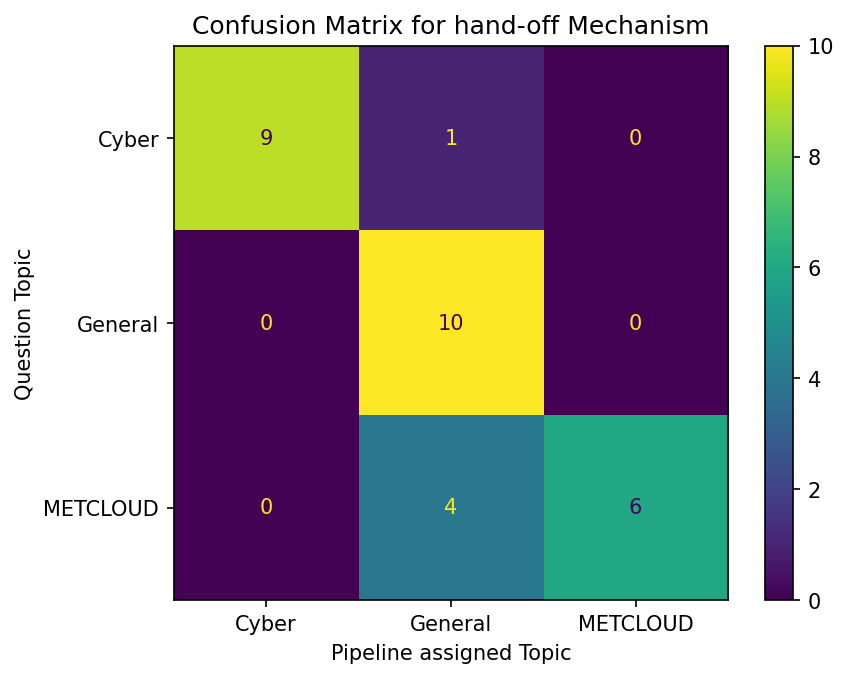

In [250]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
d.plot(ax=ax)
ax.set_title('Confusion Matrix for hand-off Mechanism')
ax.set_ylabel('Question Topic')
ax.set_xlabel('Pipeline assigned Topic')
fig.set_dpi(150)